**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2023**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 3

**Datos de la entrega:** Lunes 20 de noviembre 2023, a más tardar a las 11:59 pm

**Estudiantes:**
- Valeria Prado Rodríguez
- Jean Paul Rodríguez Flores


# Experimentación con regresión en redes neuronales artificiales

Indicaciones generales que deben seguir:
1. Se le proporciona el conjunto de datos y un archivo de texto con una breve explicación de las columnas (esta es la versión del dataset que debe usar, no busque similares en internet).
1. Realizarán regresión y el atributo a predecir es: **price**.
1. Ustedes deben ir tomando las decisiones en el proceso y documentarlas en celdas de texto y además su código debe venir ampliamente comentado. Recuerden que el profesor hace de cliente por si tienen dudas.
1. Deben dividir el dataset en tres conjuntos de datos: train (60%), validation (20%) y test (20%).
1. Ustedes proponen el diseño experimental (quiero ver qué han entendido de este concepto fundamental en data science).
1. Deben utilizar **una de estas dos herramientas** para dar seguimiento a los resultados en el caso de la red neuronal artificial:
    1. https://www.wandb.com/
    1. https://www.comet.ml/site/


Criterios de evaluación:
1. Deben presentar una implementación completa, en una de estas opciones: pytorch, tensorflow o keras (Claro que pueden usar numpy, pandas y otras bibliotecas más, para todo el tema de carga del dataset, analizarlo y pre-procesarlo). (**55 puntos**)
1. Uso de herramienta de seguimiento de resultados. (**10 puntos**)
1. Documentación de decisiones en celdas de texto y comentarios al código. (**20 puntos**)
1. Conclusiones finales: En una celda de texto al final del cuaderno, incluya sus conclusiones más importantes del experimento y algunos de los gráficos que genera la herramienta seleccionada, junto con su interpretación de los mismos. (**15 puntos**)

## 0. Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.preprocessing import RobustScaler

## 1. Definicion del conjunto de datos de entrenamiento

### 1.1. Importando el conjunto de datos

In [48]:
# leer los datos del archivo csv
df = pd.read_csv('diamonds.csv')

### 1.2 Visualizando el conjunto de datos

   carat  depth  table  price     x     y     z  cut
0   0.23   61.5   55.0    326  3.95  3.98  2.43    4
1   0.21   59.8   61.0    326  3.89  3.84  2.31    3
2   0.23   56.9   65.0    327  4.05  4.07  2.31    1
3   0.29   62.4   58.0    334  4.20  4.23  2.63    3
4   0.31   63.3   58.0    335  4.34  4.35  2.75    1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
 7   cut     53940 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 3.3 MB
None
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.0

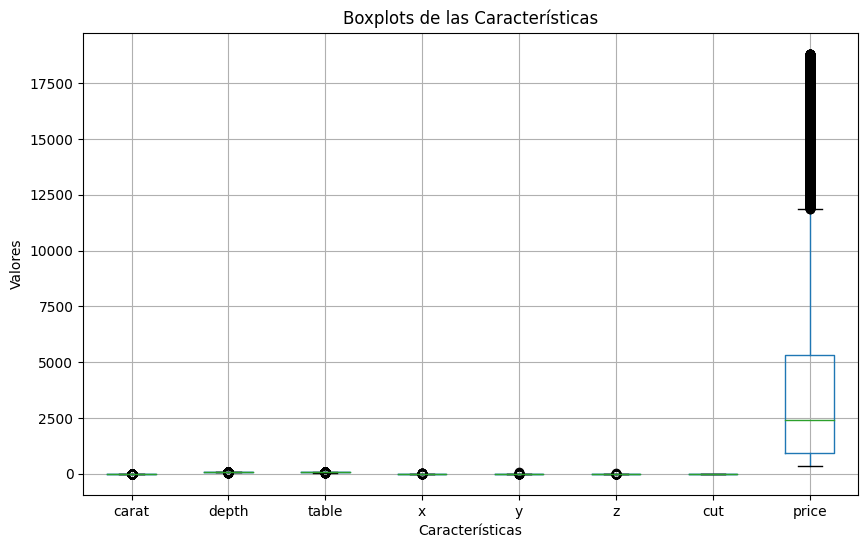

In [49]:
# Mostrar las primeras filas del DataFrame para verificar la carga
print(df.head())

# Mostrar información general sobre el DataFrame
print(df.info())

# Estadísticas descriptivas para atributos numéricos
print(df.describe())

columnas = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'price']

# Visualizar boxplots para identificar valores atípicos
plt.figure(figsize=(10, 6))
df[columnas].boxplot()
plt.title('Boxplots de las Características')
plt.ylabel('Valores')
plt.xlabel('Características')
plt.show()

### 1.3. Preprocesamiento del conjunto de datos

In [50]:
# Tratar valores nulos si los hay
df.dropna(inplace=True)

# Codificar variables categóricas como números (por ejemplo, usando one-hot encoding para 'cut' y 'color')
df = pd.get_dummies(df, columns=['cut'], drop_first=True)

new_columnas = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_1', 'cut_2', 'cut_3', 'cut_4', 'price']

# Tratar lo valores atipicos
df[new_columnas] = df[new_columnas].apply(lambda x: np.log1p(x))


# Normalizar características ('carat', 'x', 'y', 'z', 'depth', 'table')
scaler = MinMaxScaler()
features_to_normalize = ['carat', 'x', 'y', 'z', 'depth', 'table']
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

### 1.4 Division del conjunto de datos

In [51]:
# Conjunto X (sin price) y Y (solo price)
X = df.drop('price', axis=1)
y = df['price']

# train de 60%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# test y validation de 20%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 2. Definicion de la arquitectura de la Red Neuronal Artificial

### 2.1 Definimos una Red Neuronal Artificial formada por 3 capas:
* La primera capa estará formada por 30 neuronas
* La segunda capa estará formada por 10 neuronas
* La última capa estará formada por 1 neurona

In [52]:
# creacion de la red
network = models.Sequential()

# capa de 30 neuronas
network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
# capa de 10 neuronas
network.add(layers.Dense(10, activation='relu'))
# capa de 1 neurona
network.add(layers.Dense(1, activation='linear'))

Visualizar la red junto con el número total de parámetros utilizando el método *summary()*

In [53]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                330       
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 651 (2.54 KB)
Trainable params: 651 (2.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2.2. Acceso a los elementos definidos de la RNA

In [54]:
network.layers

Acceder a los parámetros del modelo que componen las neuronas de la primera hidden layer

In [55]:
hidden1 = network.layers[1]

weights, biases = hidden1.get_weights()

## 3. Configuracion de la Red Neuronal Artificial

In [56]:
network.compile(loss='mean_squared_error',
                optimizer='sgd')

## 4. Preparacion del conjunto de datos

### 4.1. Preparación de las características de entrada

In [57]:
scaler = RobustScaler()

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

## 5. Entrenamiento de la Red Neuronal Artificial

In [58]:
history = network.fit(X_train_prep,
                      y_train,
                      epochs=5,
                      validation_data=(X_val_prep, y_val))

Epoch 1/5
1012/1012 [==============================] - 6s 5ms/step - loss: 0.4809 - val_loss: 0.0722
Epoch 2/5
1012/1012 [==============================] - 4s 4ms/step - loss: 0.0719 - val_loss: 0.0669
Epoch 3/5
1012/1012 [==============================] - 6s 6ms/step - loss: 0.0674 - val_loss: 0.0769
Epoch 4/5
1012/1012 [==============================] - 4s 4ms/step - loss: 0.0657 - val_loss: 0.0687
Epoch 5/5
1012/1012 [==============================] - 4s 4ms/step - loss: 0.0644 - val_loss: 0.0648


Visualizacion de la variable **history**


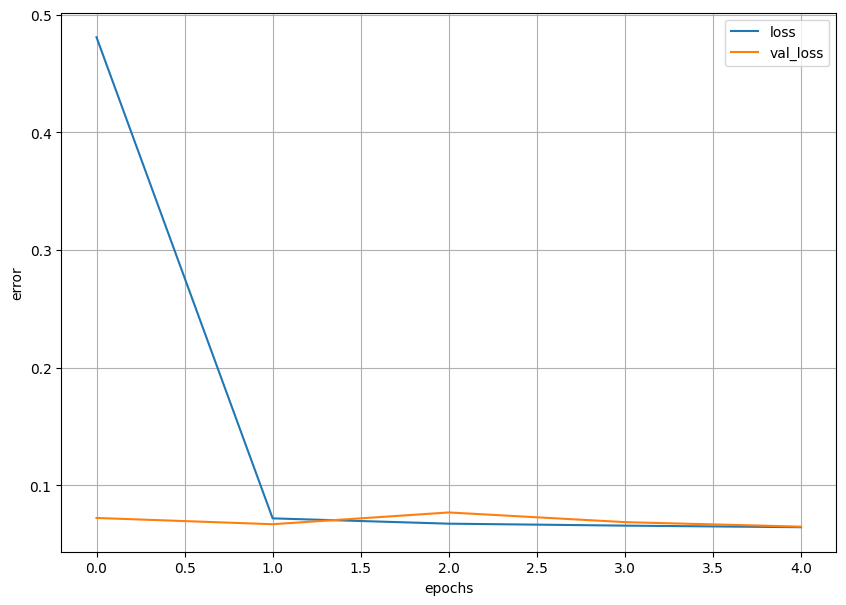

In [59]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()

## 6. Validación con el conjunto de datos de pruebas

In [60]:
test_loss = network.evaluate(X_test_prep, y_test)

print('test_mse:', test_loss)

print('test_rmse:', pow(test_loss,1/2))

338/338 [==============================] - 1s 3ms/step - loss: 0.0626
test_mse: 0.06260839104652405
test_rmse: 0.25021668818550863


## 7. Predicción de nuevos ejemplos

In [61]:
print(df.iloc[445])

carat    0.244734
depth    0.584399
table    0.331806
price    7.943428
x        0.784802
y        0.473710
z        0.439692
cut_1    0.000000
cut_2    0.693359
cut_3    0.000000
cut_4    0.000000
Name: 445, dtype: float64


In [63]:
# Suponemos que X_new es un nuevo ejemplo que el algoritmo no ha visto nunca
X_new = X_test.iloc[445]

# Representación gráfica del nuevo ejemplo que queremos predecir
df_new = pd.DataFrame([X_new], columns=new_columnas[:-1])
df_new.head()

# Verifica las columnas presentes en df_new
print(df_new.columns)

# Preprocesamos el nuevo ejemplo que queremos predecir
X_new_prep = scaler.transform(df_new)

# Relizamos la prediccion
y_predict = network.predict(X_new_prep)

y_predict

y_predict.round(2)

# Comparamos la predicción con el valor original
print("Predicción:", y_predict.round(2))
print("Valor original:", y_test.iloc[445])

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_1', 'cut_2', 'cut_3',
       'cut_4'],
      dtype='object')
1/1 [==============================] - 0s 117ms/step
Predicción: [[6.74]]
Valor original: 6.584791392385716


## Conclusion